## Birds Eye view of LLM Architecture

---

<div class="alert alert-block alert-info">
<b>Stages in Building LLM from scratch</b> 
<p>   

Below are the stages of building LLM from scratch


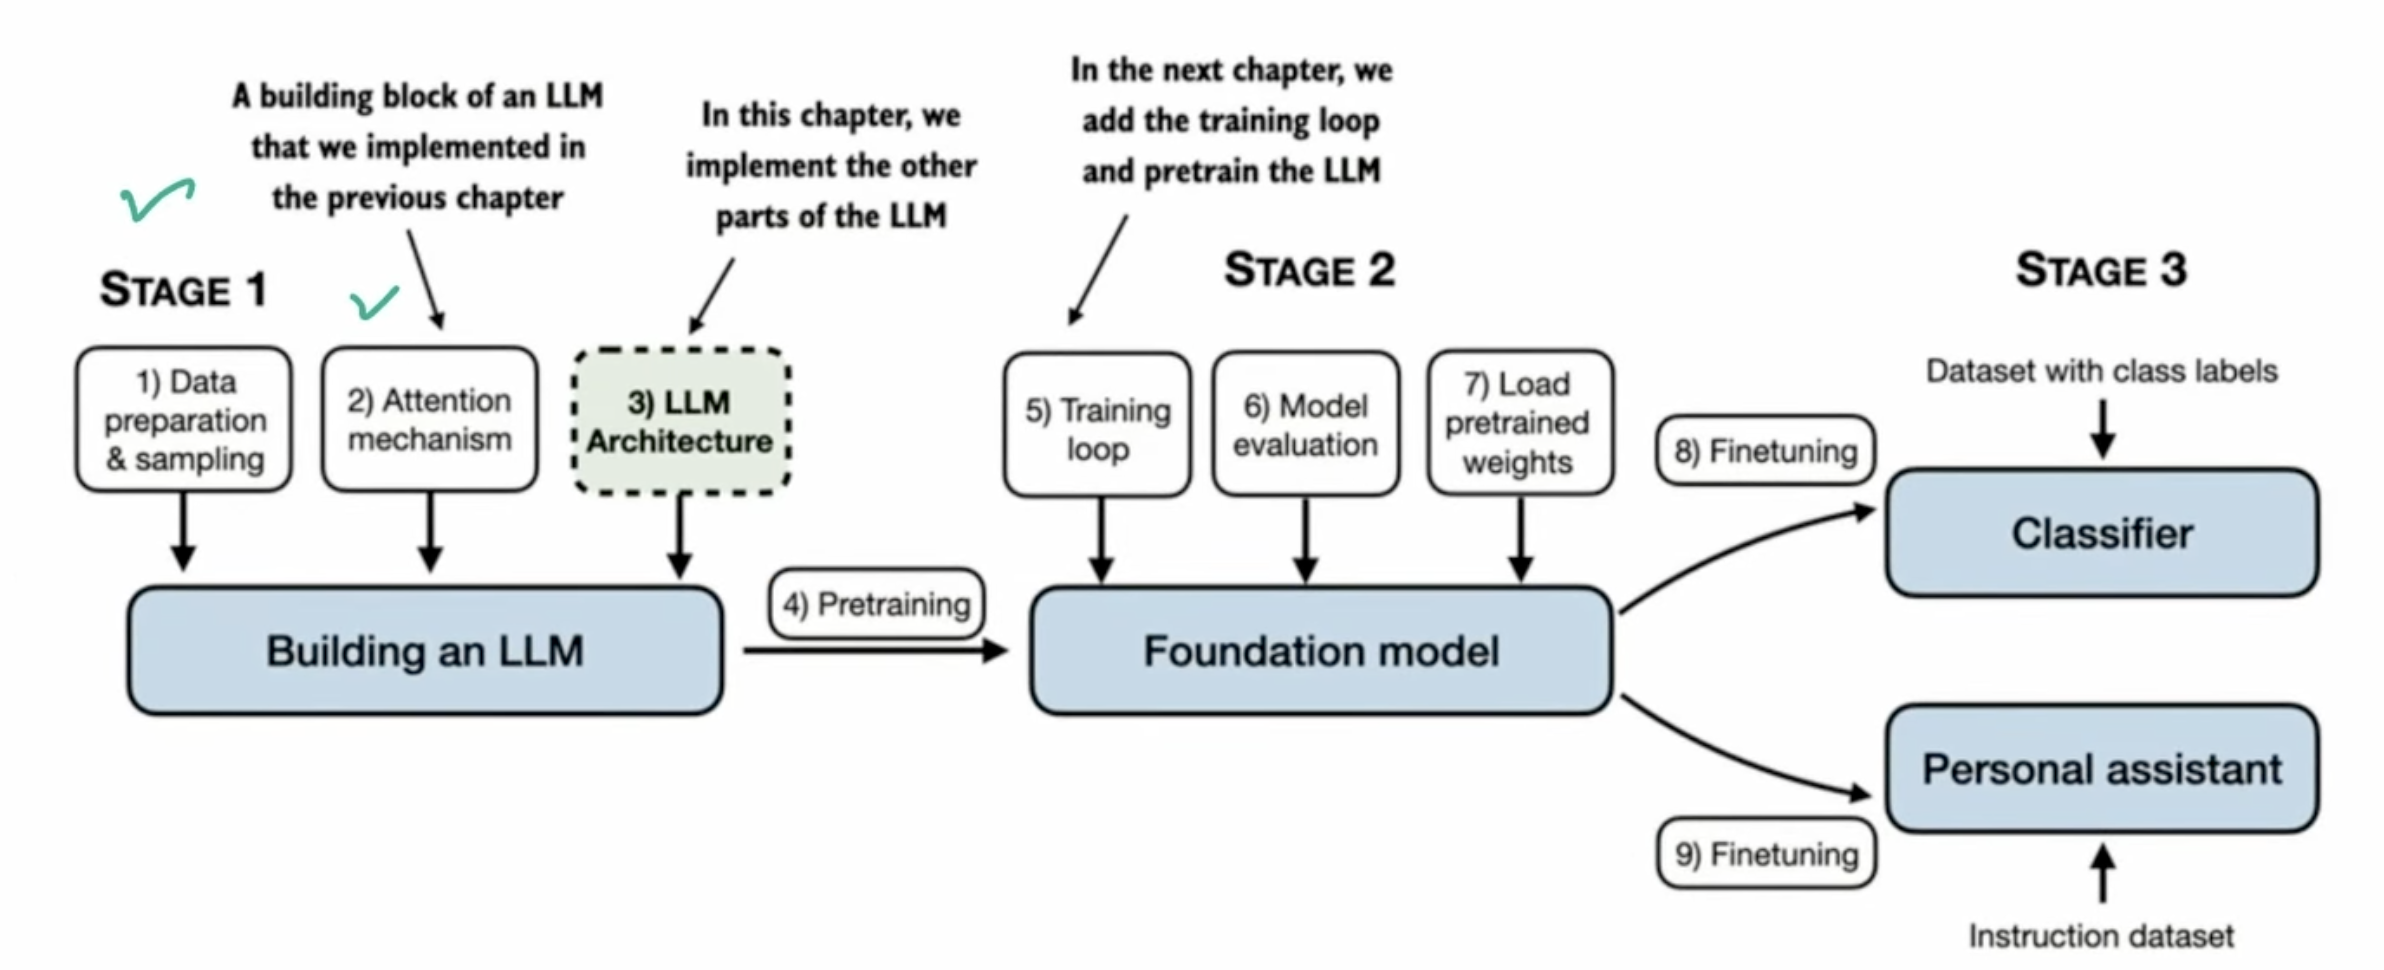



</p>
</div>





<div class="alert alert-block alert-info">
<b>Lets See the flow and building blocks of the LLM</b> 
<p>   

As your see from below the sequence

1. We give input sequence (E.g "Every efforts moves you")
2. Then we <font color=blue> tokenize </font> this input sequence using <font color=blue> Byte-Pair Encoding algorithm </font>
3. This Tokenized input is converted into <font color=blue> Embedded Vector + Positional Embedding Vector </font>
4. This Embedding vectors is then converted using <font color=blue> Context Vectors </font> with the help of <font color=blue> Masked multi-head Attention </font>
5. These Context Vector are <font color=blue> enriched vector </font> that contains semantic and details of how the token is related to other tokens in input sequence walong with the Weightable
6. Next comes the <font color=blue> Transformer Block </font> . This is the most important part of LLm architecture
7. The <font color=blue> output from transformer </font> is then decoded to predict the next word
   

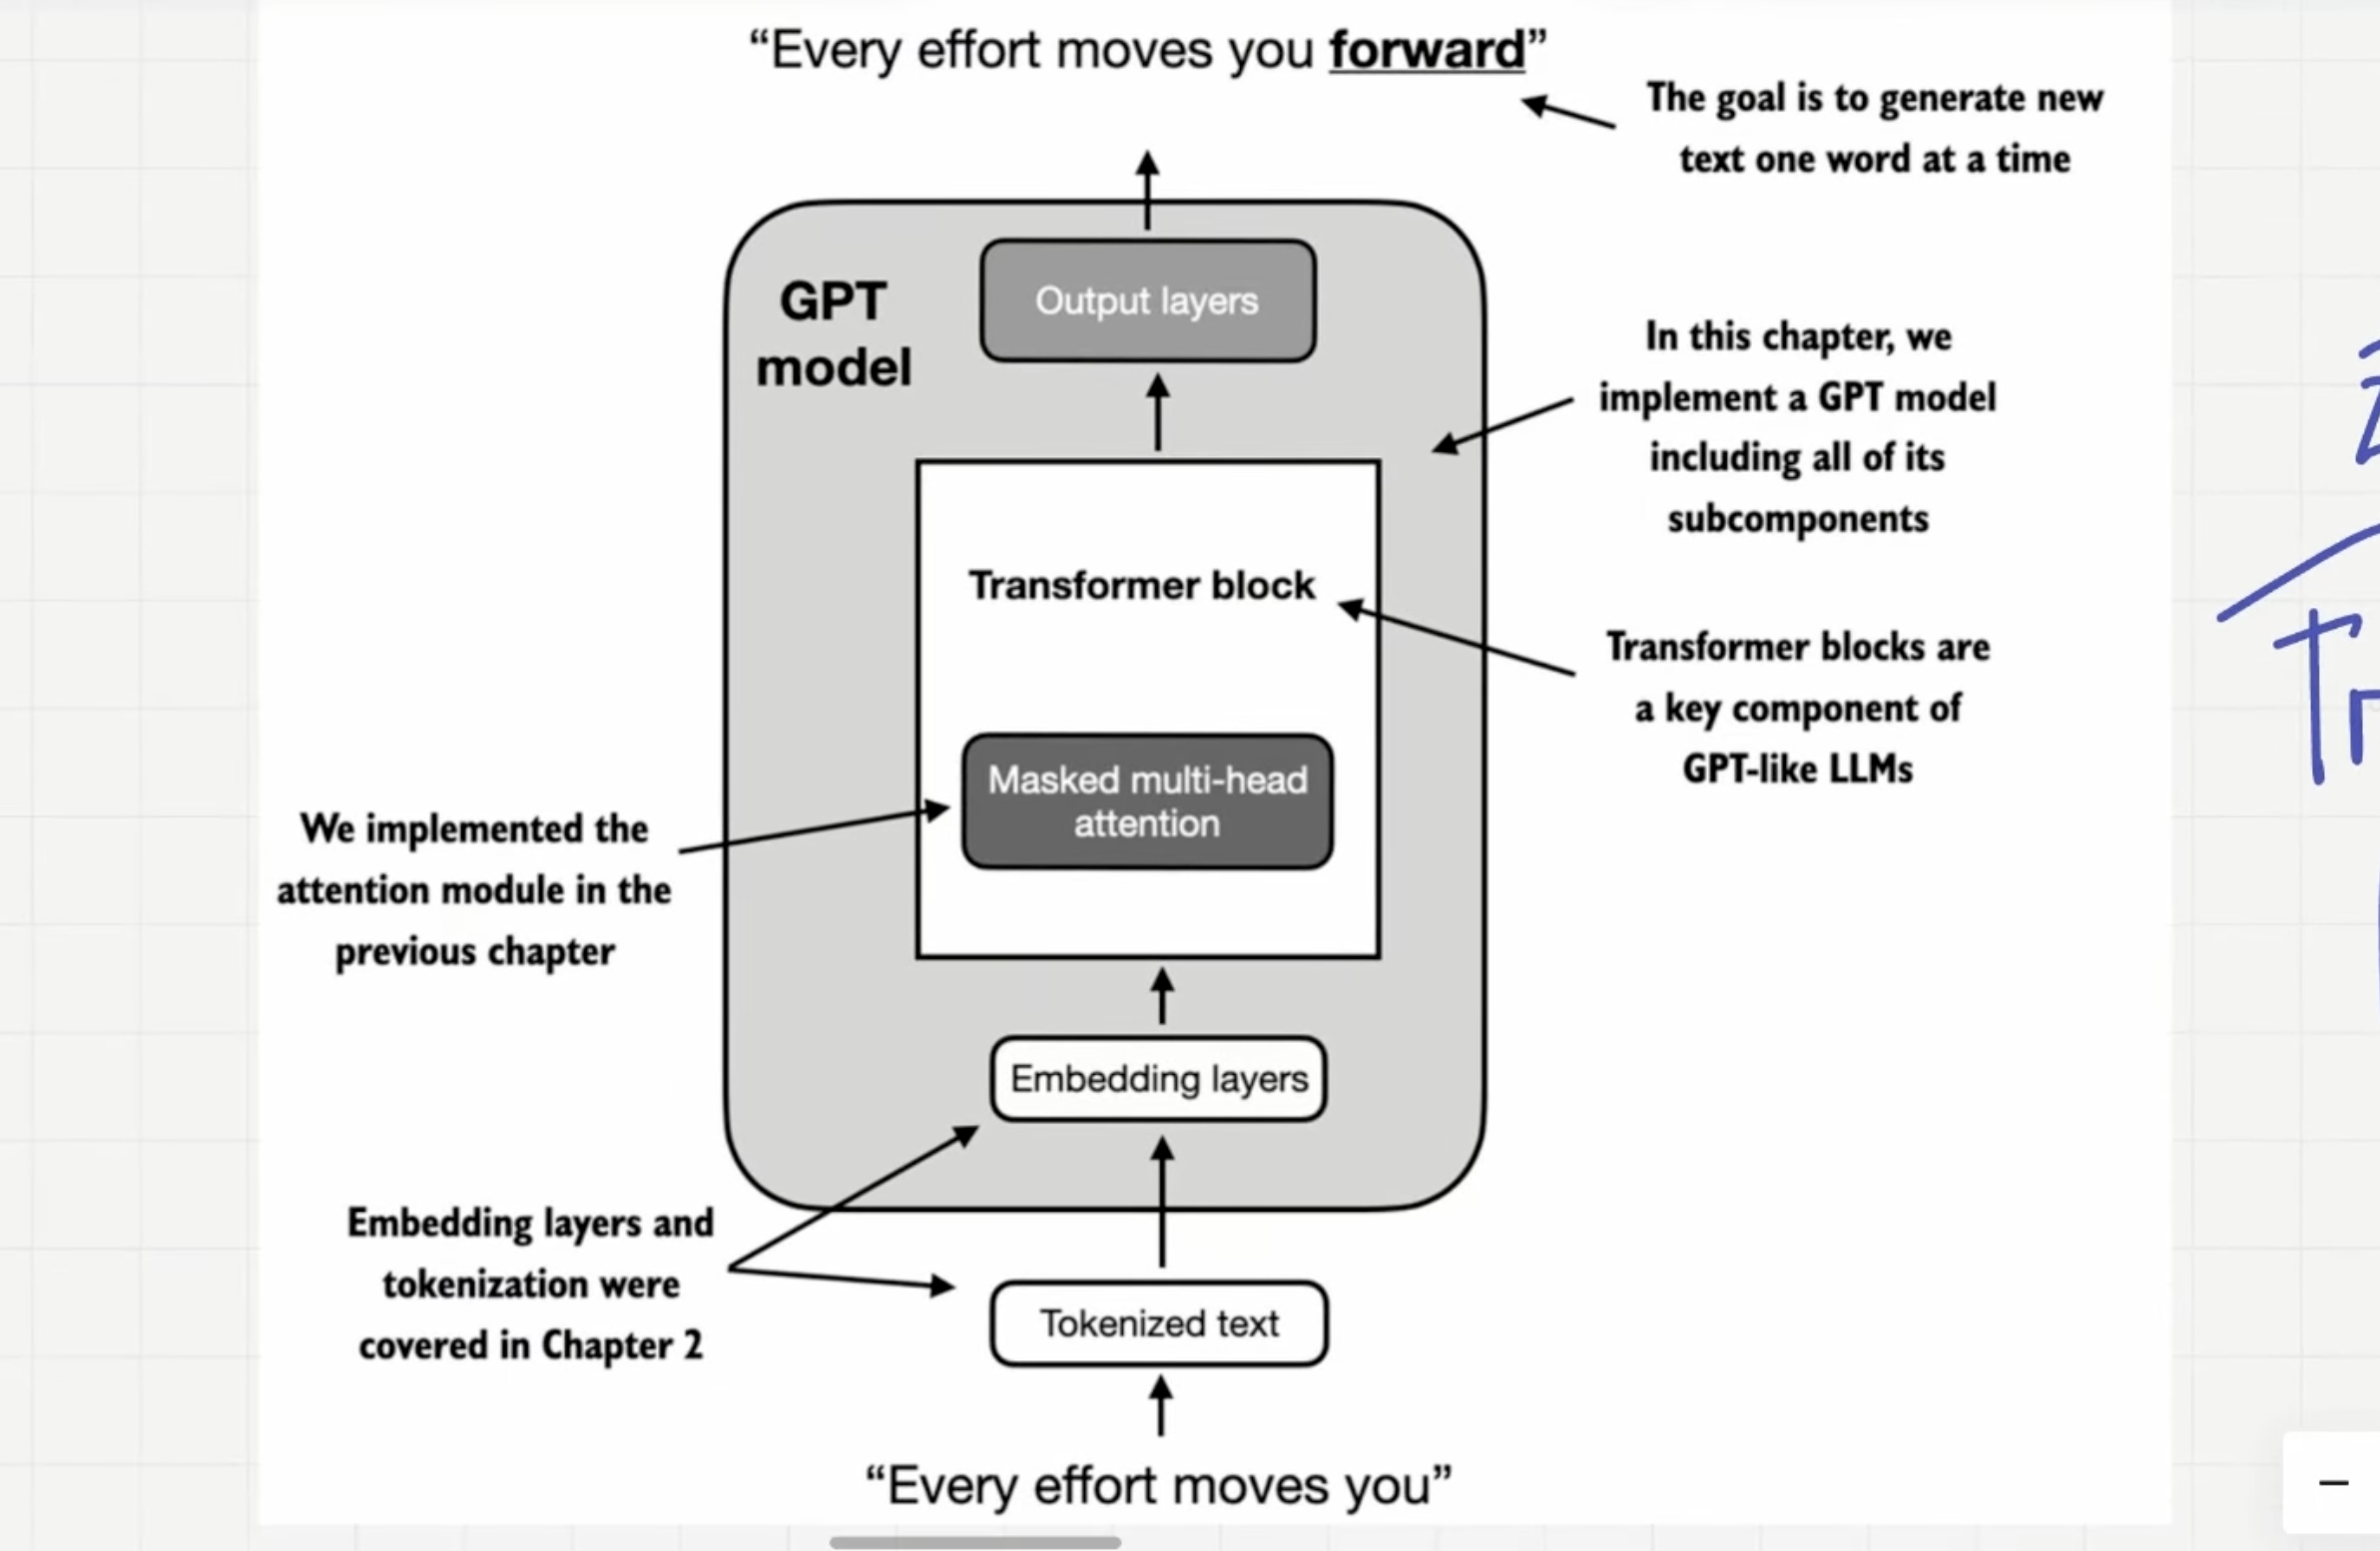



</p>
</div>




<div class="alert alert-block alert-info">
<b>Transformer </b> 
<p>   
    
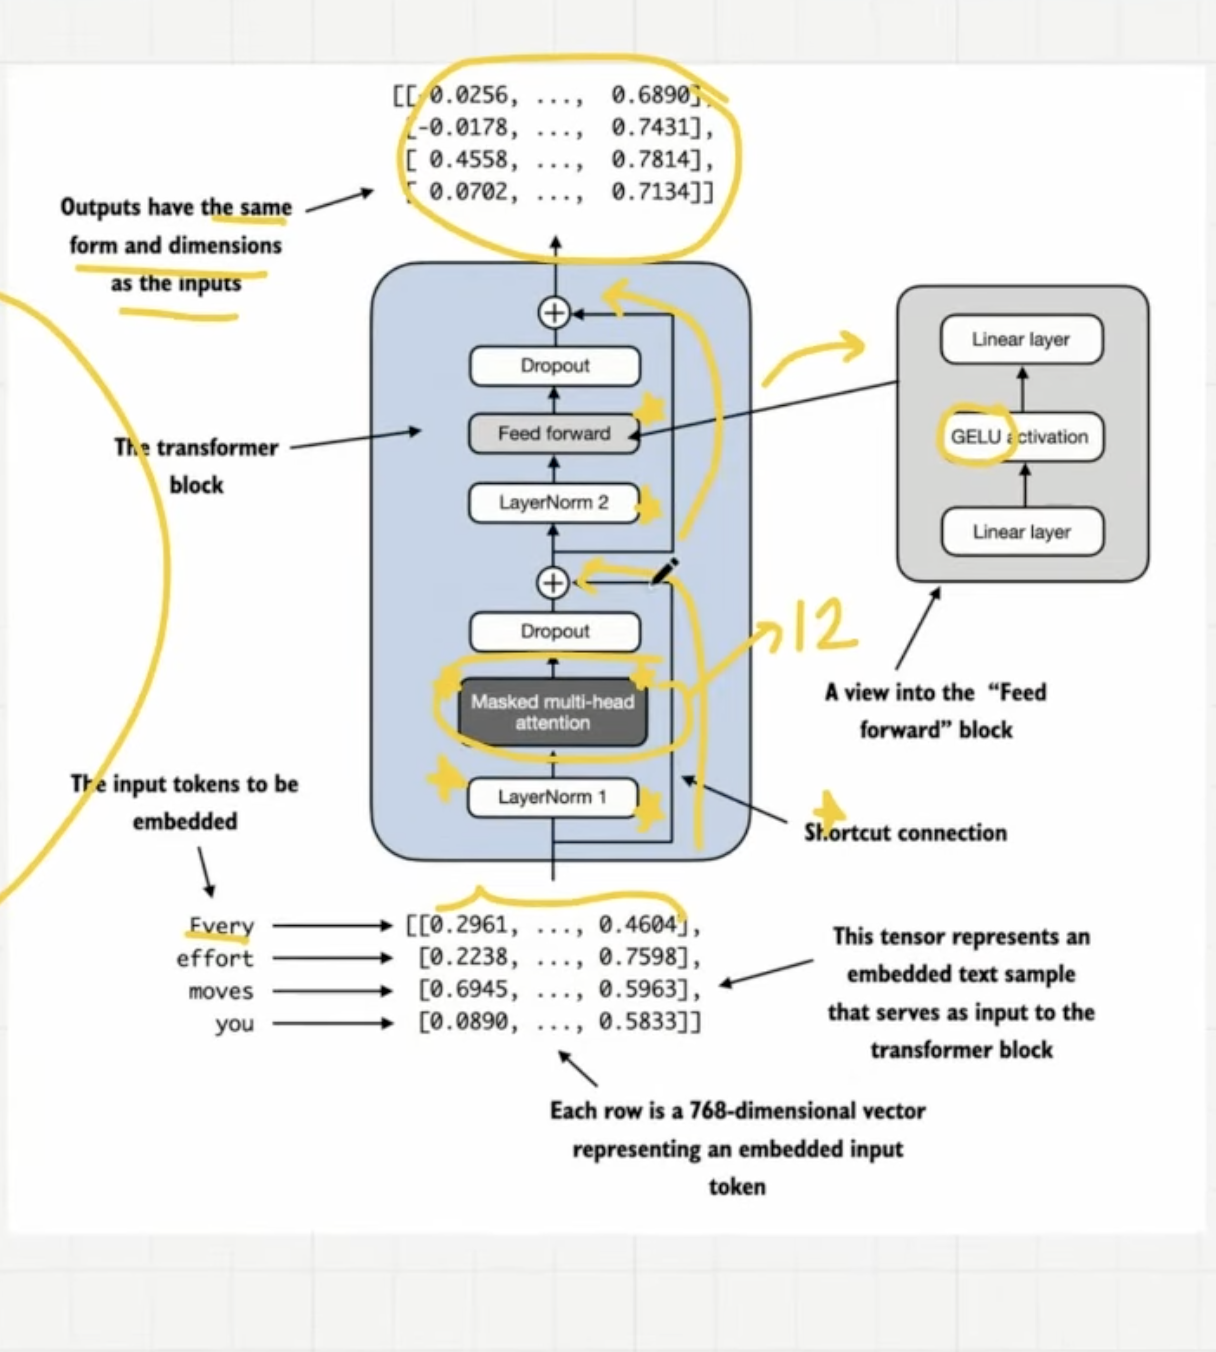

</p>
</div>



<div class="alert alert-block alert-info">
<b>Lets visualize the process/b> 
<p>  
    
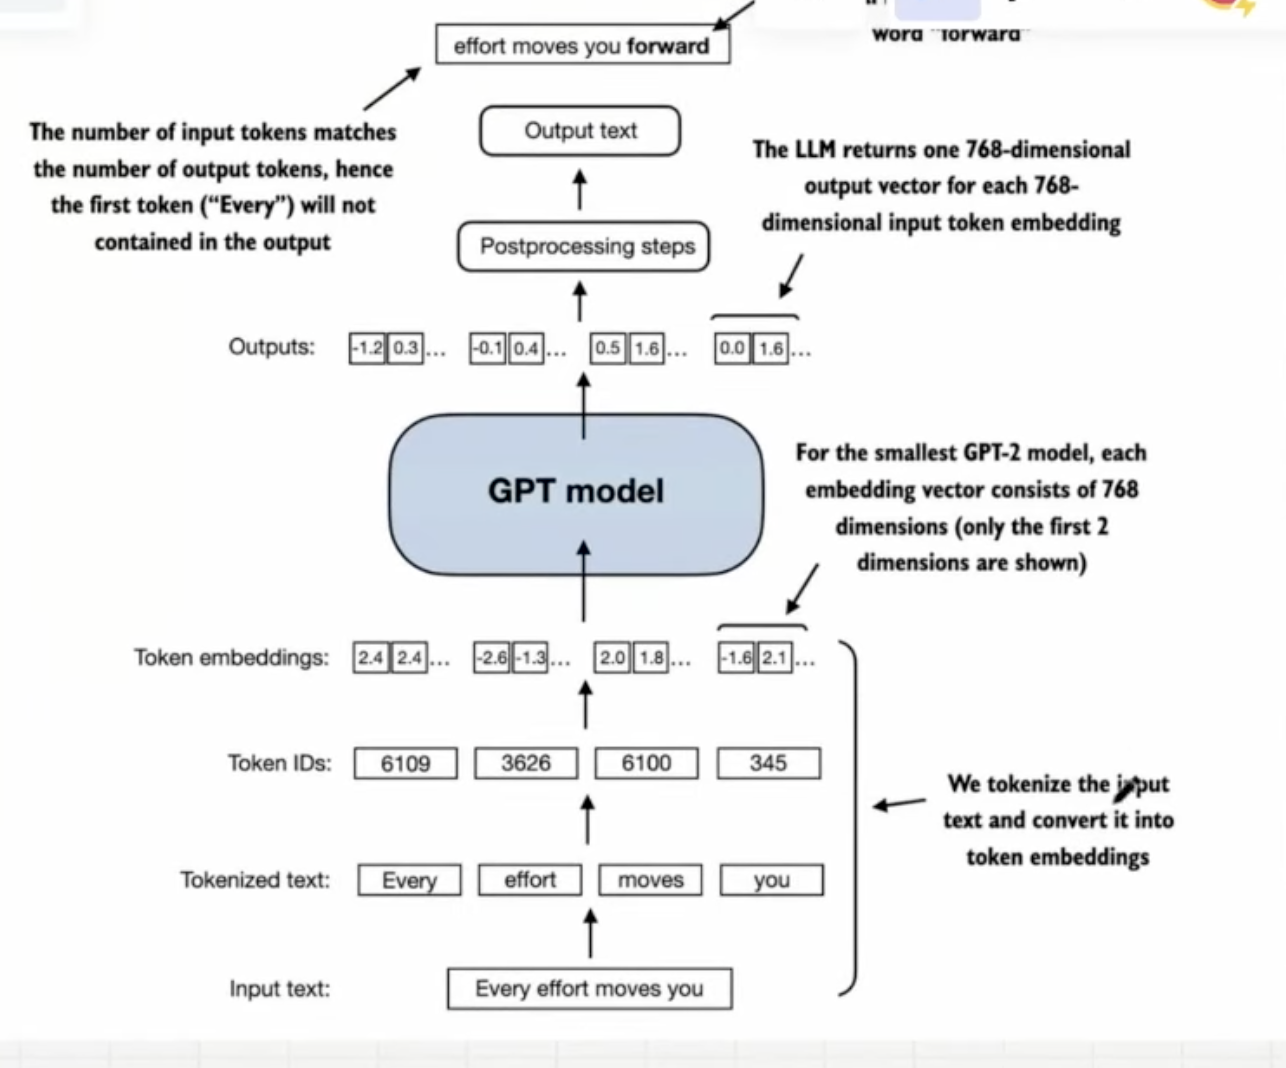

</p>
</div>

<div class="alert alert-block alert-info">
<b>What are we going to do now </b> 
<p>   
    
From the View above , we have seen the input part to LLM.

Now we shall build the transformer , which is the heart of the LLM . This transformer block has many moving part , which we will understand and code one by one.

This notebook , Lets build the Skeleton or outline of the transformer block that shows the components it will contain

</p>
</div>

# IMPLEMEMNTING A GPT MODEL FROM SCRATCH TO GENERATE TEXT

In [2]:
# Lets define the confoguration for GPT Model
# We planning to build the GPT Model with 124M parameters. This is the small GPT version

GPT_CONFIG_124M = {
  "vocab_size"     : 50257, # BPE encoding has the vocab size of 50257
  "context_length" : 1024,  # number of token we can look at ones to predict new word
  "emb_dim"        : 768,   # The Toekn Embedding dimension
  "n_heads"        : 12,    # number of attention heads
  "n_layers"       : 12,    # Number of layers (Transformer blocks)
  "drop_rate"      : 0.1,   # Dropout Rate
  "qkv_bias"       : False  # Quert-Key-Value Bias
}

### GPT ARCHITECTURE PART 1: Dummy GPT MODEL CLASS

<div class="alert alert-block alert-info">

Step 1: Use a placeholder for TransformerBlock

Step 2: Use a placeholder for LayerNorm
</div>

In [30]:
import torch
import torch.nn as nn

class DummyGPTModel(nn.Module):
    def __init__(self,cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"] , cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"] , cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        # Use a placeholder for TransformerBlock
        self.trf_blocks = nn.Sequential(
            *[DummyTransformerBlock(cfg) for _ in range(cfg["n_layers"])])
        
        # Use a placeholder for LayerNorm
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])

        # this is the layer to convert the vector output to Logits vector 
        # of size batch * Context length * vocab_size
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size , seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx) # Embedd the tokesn to higher dimensional space
        pos_embeds = self.pos_emb(torch.arange(seq_len,device=in_idx.device)) # get Pos Embedding
        x=tok_embeds + pos_embeds # Combine the Token Embeds with its position embeds
        x=self.drop_emb(x)   # Perform Droput 
        x=self.trf_blocks(x)
        x= self.final_norm(x)
        logits = self.out_head(x)
        return logits

In [31]:
class DummyTransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        # A simple placeholder

    def forward(self, x):
        # This block does nothing and just returns its input.
        return x


In [32]:
class DummyLayerNorm(nn.Module):
    def __init__(self, normalized_shape, eps=1e-5):
        super().__init__()
        # The parameters here are just to mimic the LayerNorm interface.

    def forward(self, x):
        # This layer does nothing and just returns its input.
        return x

### STEP 1: TOKENIZATION

In [33]:
import tiktoken
import torch

tokenizer = tiktoken.get_encoding("gpt2")
batch = []
txt1 = "Every effort moves you"
txt2 = "Every day holds a"
batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch = torch.stack(batch, dim=0)
print(batch)

tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


In [34]:
torch.manual_seed(123)
model = DummyGPTModel(GPT_CONFIG_124M)
logits = model(batch)
print("Output shape:", logits.shape)
print(logits)

Output shape: torch.Size([2, 4, 50257])
tensor([[[-1.2034,  0.3201, -0.7130,  ..., -1.5548, -0.2390, -0.4667],
         [-0.1192,  0.4539, -0.4432,  ...,  0.2392,  1.3469,  1.2430],
         [ 0.5307,  1.6720, -0.4695,  ...,  1.1966,  0.0111,  0.5835],
         [ 0.0139,  1.6754, -0.3388,  ...,  1.1586, -0.0435, -1.0400]],

        [[-1.0908,  0.1798, -0.9484,  ..., -1.6047,  0.2439, -0.4530],
         [-0.7860,  0.5581, -0.0610,  ...,  0.4835, -0.0077,  1.6621],
         [ 0.3567,  1.2698, -0.6398,  ..., -0.0162, -0.1296,  0.3717],
         [-0.2407, -0.7349, -0.5102,  ...,  2.0057, -0.3694,  0.1814]]],
       grad_fn=<UnsafeViewBackward0>)


<div class="alert alert-block alert-warning">

In the above example we saw , the output tensor (logits) has two rows corresponding to the two text sequences . 

Each text sample consists of 4 tokens; each token is a 50,257-dimensional vector, which matches the size of the tokenizer's vocabulary. 

This is done by the last out_head layer that performs matrix multiplication of output vector ( 4 by 768) and out_head layer ( 768 * vocab_size (50257) . 

This is how we get the dimensions . The columns has eacg vocab tolken with probability of occurenace after current token


The embedding has 50,257 dimensions because each of these dimensions refers to a
unique token in the vocabulary. At the end of this chapter, when we implement the
postprocessing code, we will convert these 50,257-dimensional vectors back into token IDs,
which we can then decode into words.

</div>

<div class="alert alert-block alert-info">
<b>Transformer Skeleton Block </b> 
<p>   

As shown in below diagram we have created the skeleton of GPT Block , that contains many different components.


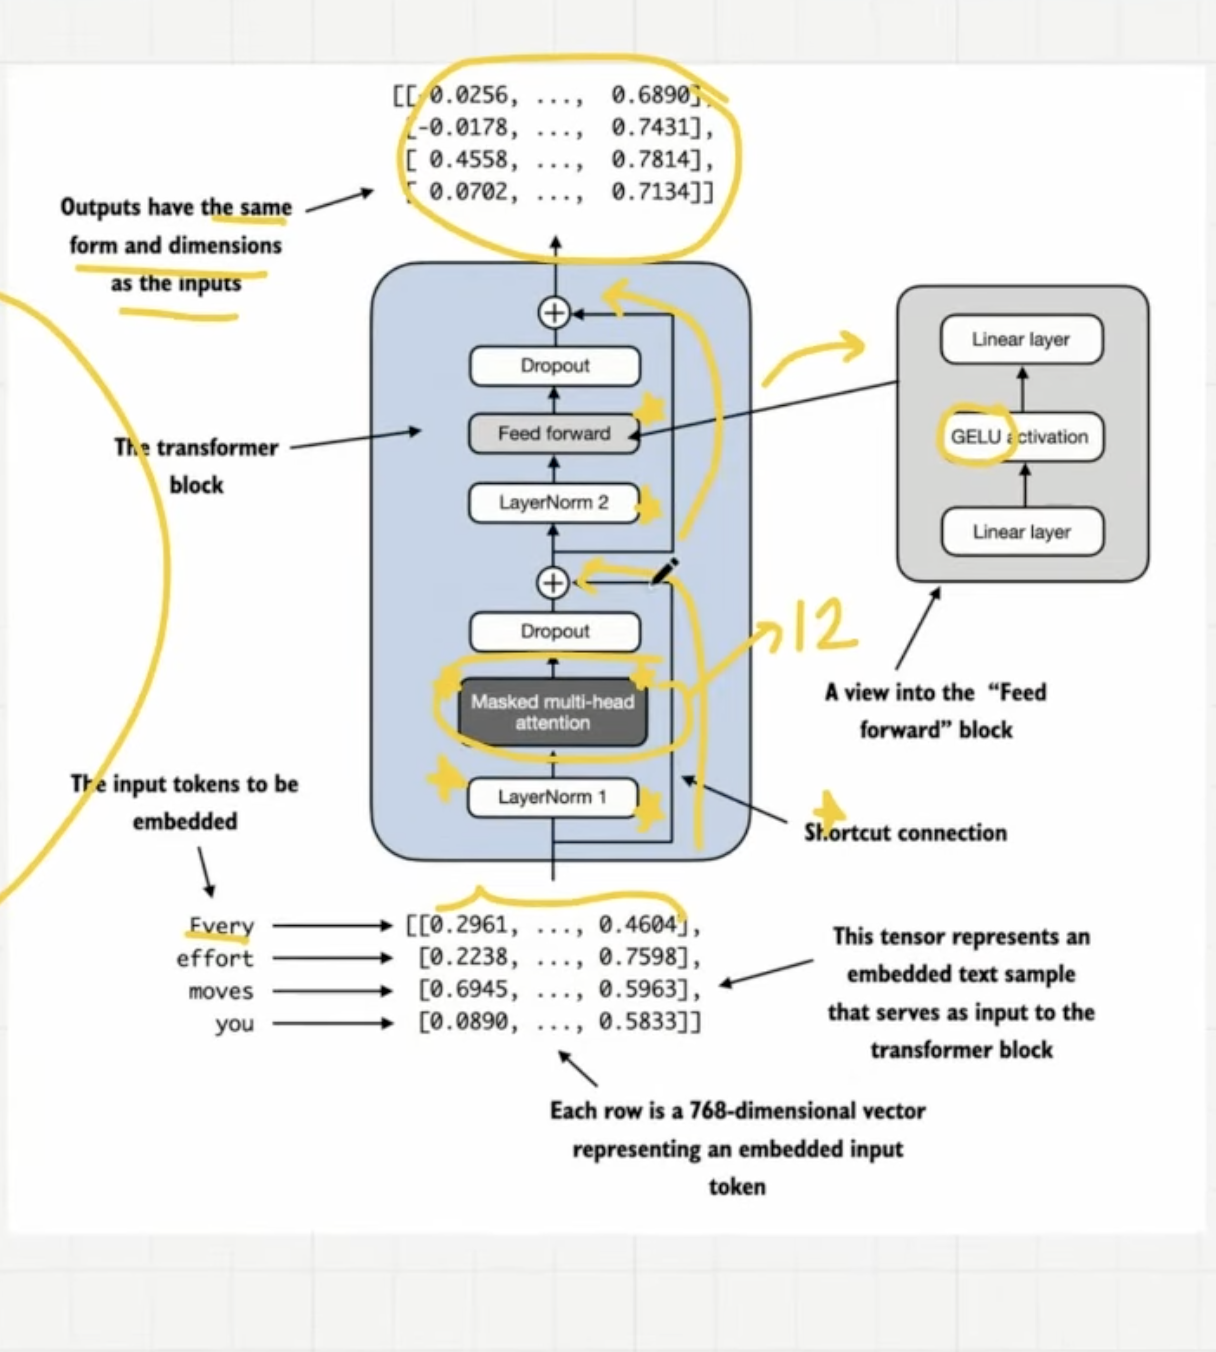

</p>
</div>

